In [31]:
library(Seurat)
library(reshape2)
library(clusterProfiler)
library(cowplot)
library(enrichplot)
library(ggplot2)
library(org.Hs.eg.db)
library(ggpubr)
library(ggpubr)
library(RColorBrewer)
setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()


Attaching package: ‘ggpubr’


The following object is masked from ‘package:enrichplot’:

    color_palette


The following object is masked from ‘package:cowplot’:

    get_legend




[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [2]:
load("data_out/3.SCLC.tumor.no.S3.rdata")
ls()

[1] "SCLC.tumor"

In [4]:
# check meta
# ==========================
SCLC.tumor
# head(SCLC.tumor@meta.data)
table(SCLC.tumor$orig.ident)


An object of class Seurat 
33538 features across 11865 samples within 1 assay 
Active assay: RNA (33538 features, 3500 variable features)
 3 dimensional reductions calculated: pca, umap, harmony


  S1   S2   S4   S5   S6   S7 
1587 2601 2330   74 4896  377 

In [6]:
# DEGs between drug-sensitive and drug-resistant patients, detailed in Table S1: S1 and S2 are drug-resistant patients,
# S4,S5 and S7 are drug-sensitive, with S6 unknown
# ==========================
 drug.res.markers <- FindMarkers(SCLC.tumor, only.pos = F, ident.1=c("S1","S2"),ident.2 = c("S4","S5","S7"),
                               min.pct = 0.01, logfc.threshold = 0.01, group.by= "orig.ident")
# write.csv(drug.res.markers, file="table_out/3_drug.res.markers_new.csv",quote=F)


In [ ]:
# DEGs between high-( S5, S7) and low-immune(S1, S2, S4, S6) infiltration patients
# ==================================================
Binf.markers2 <- FindMarkers(SCLC.tumor, only.pos = F, ident.1=c("S5","S7"),ident.2=c("S1","S2","S4","S6"),
                             min.pct = 0.01, logfc.threshold = 0.01, group.by= "orig.ident")
# write.csv(Binf.markers2, file="table_out/3_immune.group_Binf.markers2.csv",quote=F)

In [ ]:
# markers of cluster 11 and 13 
# ==========================
cluster11.markers <- FindMarkers(SCLC.tumor, ident.1 = 11, min.pct = 0.01, logfc.threshold = 0.01)
cluster13.markers <- FindMarkers(SCLC.tumor, ident.1 = 13, min.pct = 0.01, logfc.threshold = 0.01)

# write.csv(cluster11.markers, file="table_out/3_cluster11.markers_new.csv",quote=F)
# write.csv(cluster13.markers, file="table_out/3_cluster13.markers_new.csv",quote=F)


In [9]:
 geneList= cluster13.markers$avg_log2FC
  names(geneList)= toupper(rownames(cluster13.markers))
  geneList=sort(geneList,decreasing = T)
  head(geneList);length(geneList)

  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
 

SCGB1A1     CAPS     SLPI C20ORF85   BPIFB1    GSTA1 
4.821486 4.794499 4.708468 4.699667 4.434562 4.426984

[1] 16347

In [10]:
  #选择gmt文件
  # ==================================
  # go.bp.chose <- "data_input/gmtfile/go.bp.chose.gmt"
  # kegg_stemness <- "data_input/gmtfile/kegg_pathway_chosed_and_stemness_signature.gmt"
  kegg <- "data_input/gmtfile/c2.cp.kegg.v7.2.symbols.gmt"
  
  library(GSEABase)
  geneset <- read.gmt(kegg)
  length(unique(geneset$term))

  GSEA(geneList, TERM2GENE = geneset)->edo

  gsea_results_df <- egmt@result
  # write.csv(gsea_results_df,file = 'table_out/3.5.gsea_results_df_cluster13.csv')
  # write.csv(gsea_results_df,file = 'table_out/3.5.gsea_results_df_cluster11.csv')

Loading required package: annotate

Loading required package: XML

Loading required package: graph


Attaching package: ‘graph’


The following object is masked from ‘package:XML’:

    addNode




[1] 186

## Figure 2e

In [14]:
library(tidyverse)

# ==========================================
read.delim("table_out/3.5.gsea_results_df_cluster11.csv",header=T,row.names = 1, sep = ",")->cluster11
read.delim("table_out/3.5.gsea_results_df_cluster13.csv",header=T,row.names = 1, sep = ",")->cluster13
C11_neg <- subset(cluster11, NES < 0)
C11_pos <- subset(cluster11, NES > 0)
C13_neg <- subset(cluster13, NES < 0)
C13_pos <- subset(cluster13, NES > 0)

In [15]:
C11_neg[,"NES"]->C11_nes_N
C13_neg[,"NES"]->C13_nes_N
names(C11_nes_N)<-rownames(C11_neg)
names(C13_nes_N)<-rownames(C13_neg)

C11_pos[,"NES"]->C11_nes_P
C13_pos[,"NES"]->C13_nes_P
names(C11_nes_P)<-rownames(C11_pos)
names(C13_nes_P)<-rownames(C13_pos)

move=20
cbind((-1)*1:length(C11_nes_N)-move,sort(C11_nes_N))->C11_N_mat
cbind((-1)*1:length(C11_nes_P)-move,sort(C11_nes_P,decreasing=T))->C11_P_mat
cbind(1:length(C13_nes_N)+ move,sort(C13_nes_N,))->C13_N_mat
cbind(1:length(C13_nes_P)+ move,sort(C13_nes_P,decreasing=T))->C13_P_mat


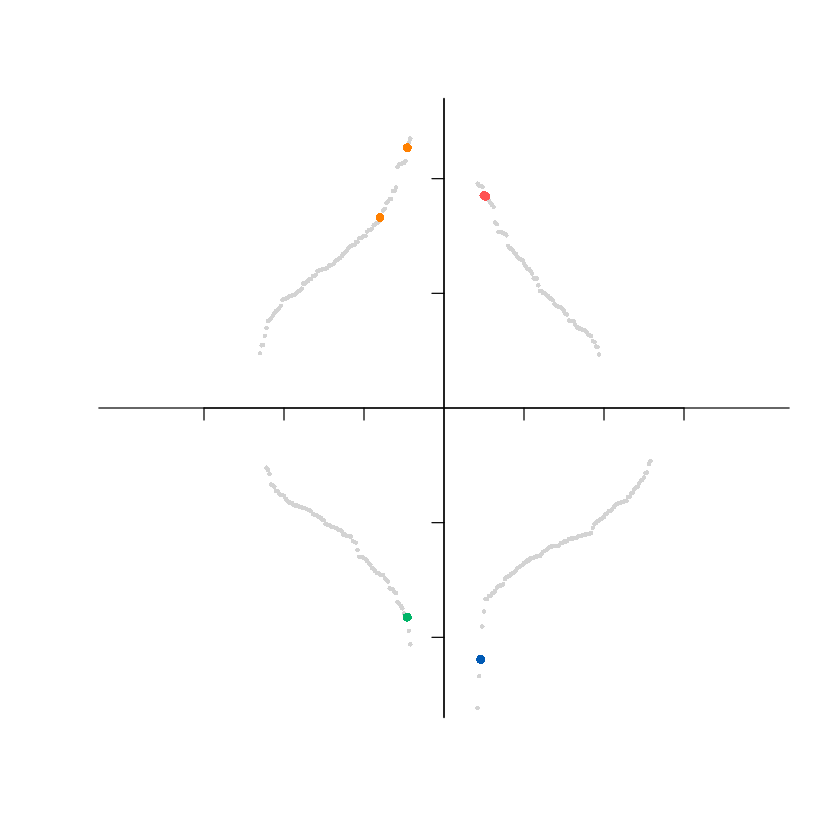

In [22]:
# pdf(file = "plot/03/Figure.2e.pdf")

plot((-1)*1:length(C11_nes_N)-move,sort(C11_nes_N),ylim=c(-2.5,2.5),xlim=c(-200,200),pch=16,col="lightgrey",cex=0.5, bty ="n",axes=F,frame.plot=F, xaxt='n', ann=FALSE, yaxt='n')

axis(1, pos=0,at=setdiff(seq(-150,150,by=50),0),labels=F)
axis(2, pos=0,at=setdiff(seq(-3,3,by=1),0),labels=F)

abline(h=0)
abline(v=0)

P2_col="#005AB5"
P1_col="#FF5151"
P4_col="#FF8000"
P3_col="#01B468"

points((-1)*1:length(C11_nes_P)-move,sort(C11_nes_P,decreasing=T),pch=16,col="lightgrey",cex=0.5)
points(1:length(C13_nes_N)+ move,sort(C13_nes_N,),pch=16,col="lightgrey",cex=0.5)
points(1:length(C13_nes_P)+ move,sort(C13_nes_P,decreasing=T),pch=16,col="lightgrey",cex=0.5)

points(C11_N_mat["KEGG_CELL_CYCLE",][1],C11_N_mat["KEGG_CELL_CYCLE",][2],col= P3_col,pch=16)
points(C13_N_mat["KEGG_CELL_CYCLE",][1],C13_N_mat["KEGG_CELL_CYCLE",][2],col= P2_col,pch=16)


points(C11_P_mat["KEGG_DRUG_METABOLISM_CYTOCHROME_P450",][1],C11_P_mat["KEGG_DRUG_METABOLISM_CYTOCHROME_P450",][2],col= P4_col,pch=16)
points(C13_P_mat["KEGG_DRUG_METABOLISM_CYTOCHROME_P450",][1],C13_P_mat["KEGG_DRUG_METABOLISM_CYTOCHROME_P450",][2],col= P1_col,pch=16)


points(C11_P_mat["KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",][1],C11_P_mat["KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",][2],col= P4_col,pch=16)
points(C13_P_mat["KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",][1],C13_P_mat["KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",][2],col= P1_col,pch=16)

# dev.off()

## fgsea plot -- cluster 11

In [27]:
cluster11.markers <- read.csv("table_out/3_cluster11.markers_new.csv", row.names = 1)
head(cluster11.markers);dim(cluster11.markers)

geneList= cluster11.markers$avg_log2FC
  names(geneList)= toupper(rownames(cluster11.markers))
  geneList=sort(geneList,decreasing = T)
  head(geneList);length(geneList)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EPHA2,0,0.5157833,0.477,0.007,0
GJB3,0,0.4937424,0.477,0.006,0
LPAR3,0,0.2528082,0.314,0.003,0
CLCA2,0,0.8928927,0.616,0.001,0
VTCN1,0,0.5897930,0.605,0.001,0
FMO3,0,0.7394054,0.512,0.002,0


[1] 15648     5

SCGB3A1  SCGB1A1     SLPI SERPINB3   BPIFB1    KRT19 
6.435361 6.135446 5.584939 5.531929 4.707863 4.411043

[1] 15648

In [28]:
  kegg_stemness <- "data_input/gmtfile/kegg_pathway_chosed_and_stemness_signature.gmt"
  library(GSEABase)
  geneset <- read.gmt(kegg_stemness)
  length(unique(geneset$term))

  GSEA(geneList, TERM2GENE = geneset)->edo


[1] 3

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



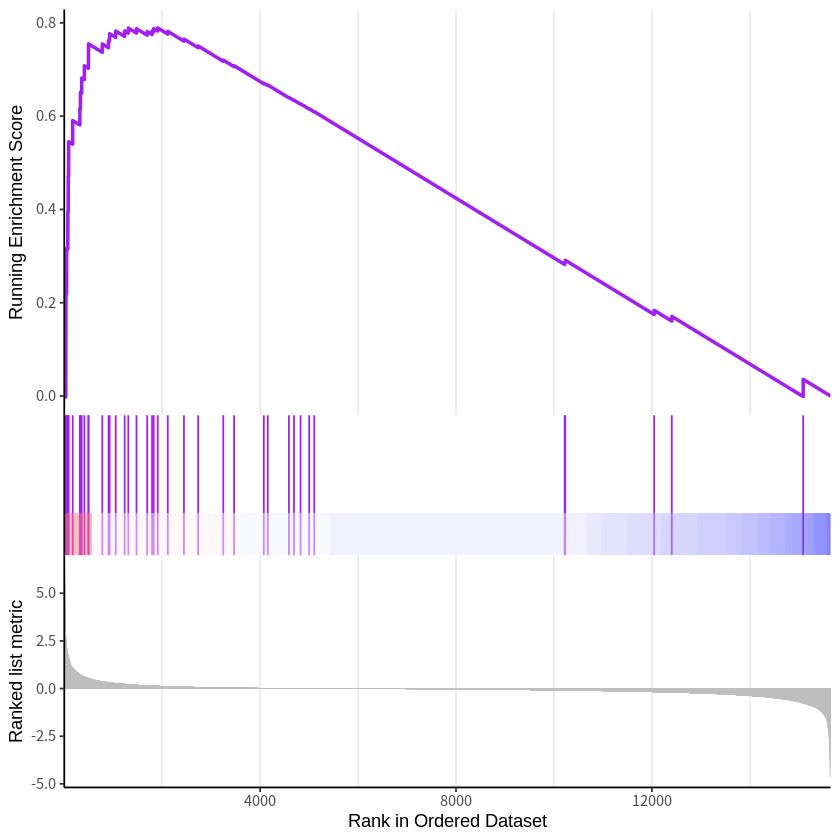

In [34]:
# plot
# ==================================
source("/media/inspur/AS2150G2/LDK/sclc_metastasis/data_input/source.R")

library(enrichplot)
# pdf(file = "plot/03/KEGG_DRUG_METABOLISM_CYTOCHROME_P450_cluster11.pdf", width = 6.5,height = 5.1)
gseaplot_custom(edo, geneSetID = "KEGG_DRUG_METABOLISM_CYTOCHROME_P450",color=c("purple"))
# dev.off()

# pdf(file = "plot/03/stemness_signature_cluster11.pdf", width = 6.5,height = 5.1)
# gseaplot_custom(edo, geneSetID = "stemness_signature",color=c("purple")) #  the bar in this plot 
# dev.off()


## fgsea plot -- cluster 13

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LINC01759,0,0.2574759,0.513,0.002,0
C1orf158,0,0.9604056,0.872,0.001,0
EPHA2,0,0.4916125,0.692,0.008,0
KLHDC7A,0,0.2983989,0.564,0.003,0
DCDC2B,0,1.1001593,0.897,0.005,0
TCTEX1D4,0,2.2470569,0.923,0.002,0


[1] 16347     5

SCGB1A1     CAPS     SLPI C20ORF85   BPIFB1    GSTA1 
4.821486 4.794499 4.708468 4.699667 4.434562 4.426984

[1] 16347

[1] 3

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



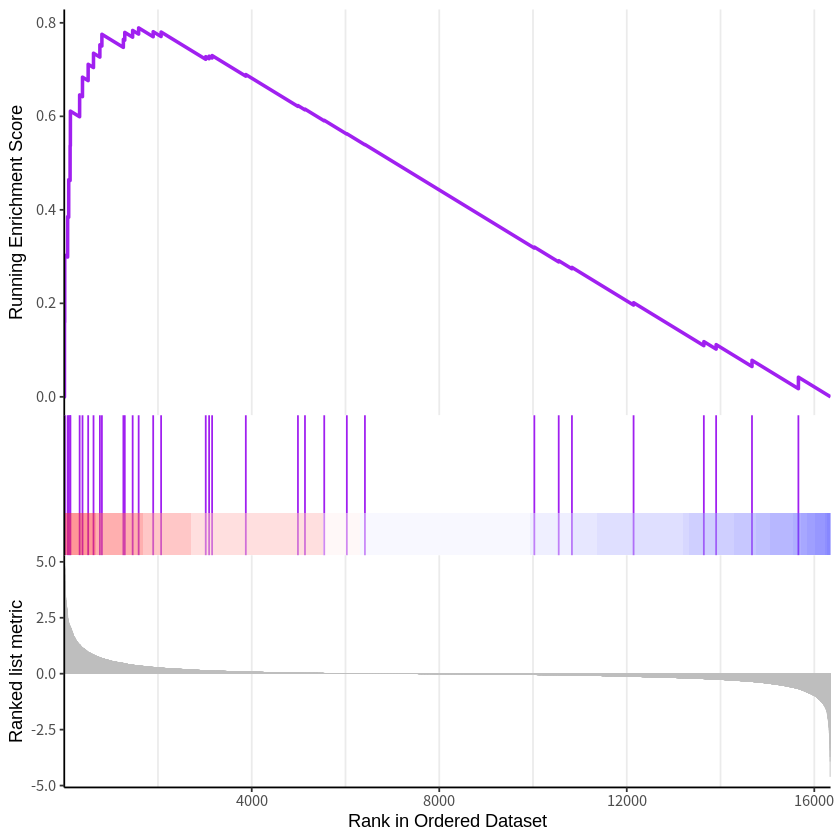

In [35]:
cluster13.markers <- read.csv("table_out/3_cluster13.markers_new.csv", row.names = 1)
head(cluster13.markers);dim(cluster13.markers)

geneList= cluster13.markers$avg_log2FC
  names(geneList)= toupper(rownames(cluster13.markers))
  geneList=sort(geneList,decreasing = T)
  head(geneList);length(geneList)

  kegg_stemness <- "data_input/gmtfile/kegg_pathway_chosed_and_stemness_signature.gmt"
  library(GSEABase)
  geneset <- read.gmt(kegg_stemness)
  length(unique(geneset$term))

  GSEA(geneList, TERM2GENE = geneset)->edo

# plot
# ==================================
library(enrichplot)

# pdf(file = "plot/03/KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450_cluster13.pdf", width = 6,height = 4.5)
  gseaplot_custom(edo, geneSetID = "KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450",color=c("purple"))
# dev.off()


## fgsea plot -- high-( S5, S7) v.s. low-immune(S1,S2 S4, S6) infiltration samples

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GPR157,0,0.2462303,0.220,0.005,0
AKR7A3,0,1.5892242,0.685,0.020,0
LDLRAD1,0,0.2556738,0.233,0.006,0
GIPC2,0,0.2774431,0.326,0.014,0
F5,0,0.1660598,0.200,0.001,0
C4BPB,0,0.2327448,0.264,0.001,0


[1] 17428     5

HLA-B    HLA-C    CALCA TMEM176A    WFDC2      B2M 
4.231760 3.427789 3.313173 3.114970 2.868033 2.451703

[1] 17428

[1] 4

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



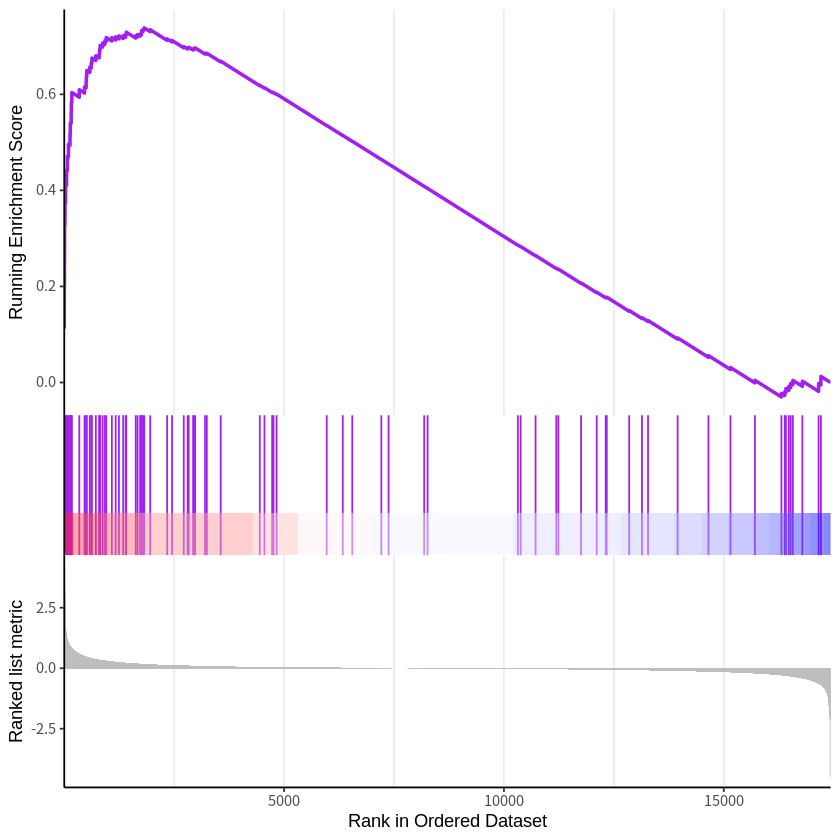

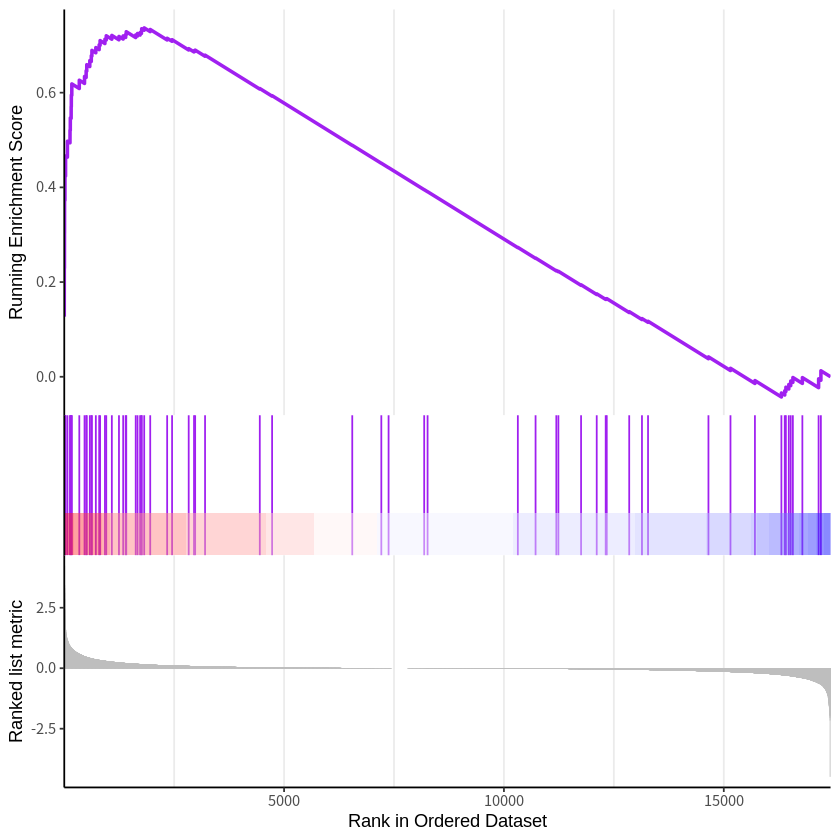

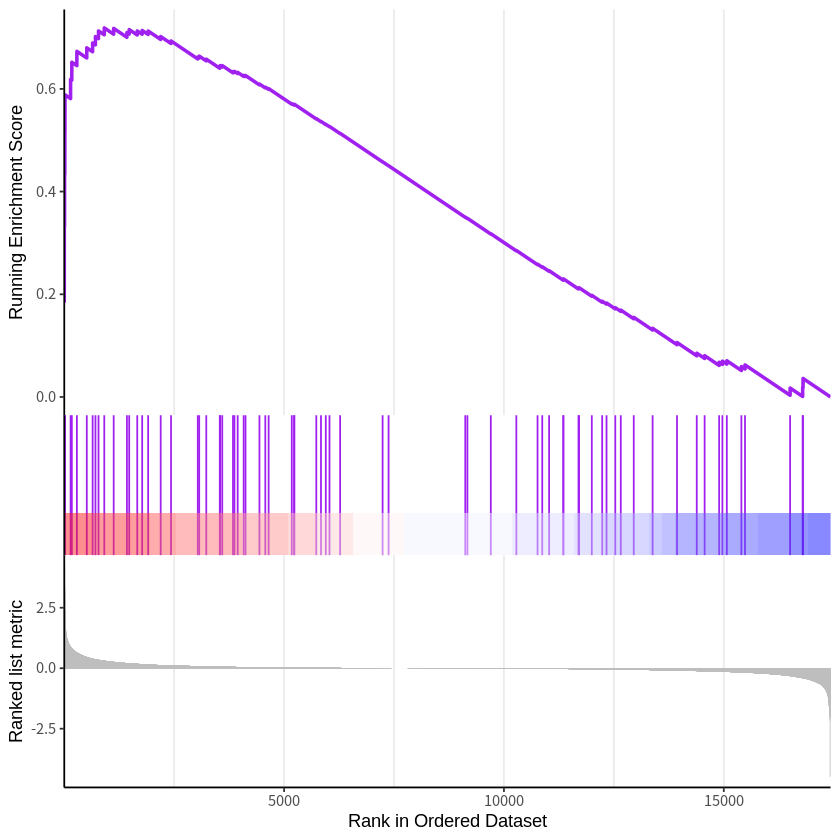

In [43]:
Binf.markers2 <- read.csv("table_out/3_immune.group_Binf.markers2.csv", row.names = 1)

head(Binf.markers2);dim(Binf.markers2)

geneList= Binf.markers2$avg_log2FC
names(geneList)= toupper(rownames(Binf.markers2))
geneList=sort(geneList,decreasing = T)
head(geneList);length(geneList)

go.bp.chose <- "data_input/gmtfile/go.bp.chose.gmt"
library(GSEABase)
geneset <- read.gmt(go.bp.chose)
length(unique(geneset$term))

GSEA(geneList, TERM2GENE = geneset)->edo

# plot
# ==================================
library(enrichplot)

# pdf(file = "plot/03/GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I_custom.pdf", width = 6.5,height = 5.1)
gseaplot_custom(edo, geneSetID = "GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I",color=c("purple"))
# dev.off()

# pdf(file = "plot/03/GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I_custom.pdf", width = 6.5,height = 5.1)
gseaplot_custom(edo, geneSetID = "GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I",color=c("purple"))
# dev.off()

# pdf(file = "plot/03/GO_RESPONSE_TO_TYPE_I_INTERFERON_custom.pdf",width = 6.5,height = 5.1)
gseaplot_custom(edo, geneSetID = "GO_RESPONSE_TO_TYPE_I_INTERFERON",color=c("purple"))
# dev.off()


In [44]:
gsea_results_df <- edo@result
head(gsea_results_df[,c('ID','pvalue','p.adjust' )]);length(rownames(gsea_results_df))
# write.csv(gsea_results_df,file = 'gsea_results_df.csv')


,ID,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,1.462389e-08,5.849554e-08
GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,4.607296e-07,9.214593e-07
GO_RESPONSE_TO_TYPE_I_INTERFERON,GO_RESPONSE_TO_TYPE_I_INTERFERON,1.500368e-06,2.000491e-06
GO_REGULATION_OF_T_CELL_MEDIATED_CYTOTOXICITY,GO_REGULATION_OF_T_CELL_MEDIATED_CYTOTOXICITY,2.188819e-06,2.188819e-06


[1] 4

In [46]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RColorBrewer_1.1-2    ggpubr_0.4.0          forcats_0.5.1        
 [4] stringr_1.4.0         dplyr_1.0.7           purrr_0.3.4          
 [7] readr_2.1.1           tidyr_1.1.4           tibble_3.1.6         
[10] tidyverse_1.3.1       GSEABase_1.56.0       graph_1.72.0         
[13]